# Exploratory Analysis

In this notebook we will explore the data set and it's features.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_csv('../data/clean_data.csv')
display(data.head())
display(data.describe())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,booking_window_days,AppointmentDayOfWeek,ScheduledHour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,1,4,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False,1,4,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,False,1,4,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False,1,4,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,False,1,4,16


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,booking_window_days,AppointmentDayOfWeek,ScheduledHour
count,1.104430e+05,1.104430e+05,110443.000000,110443.000000,110443.000000,110443.000000,110443.000000,110443.000000,110443.000000,110443.000000,110443.000000,110443.000000
mean,1.474867e+14,5.675668e+06,37.068397,0.098286,0.196835,0.071838,0.030414,0.022192,0.320826,9.776690,1.857909,10.774101
std,2.560901e+14,6.998550e+04,23.099285,0.297702,0.397608,0.258221,0.171724,0.161389,0.466796,14.273117,1.371911,3.216697
min,3.921784e+04,5.209081e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,4.172419e+12,5.640374e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000
50%,3.172598e+13,5.680618e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,10.000000
75%,9.438788e+13,5.725563e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,3.000000,13.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,126.000000,5.000000,21.000000


## Distributions

First we will look at the distribution of the variables.

#### No-Show

In [3]:
print('%d%% of our appointments are No-Shows.' % (np.mean(data['No-show'].values) * 100))

20% of our appointments are No-Shows.


#### Age

In [4]:
print('The ages in the dataset range from %d to %d' % (data.Age.min(), data.Age.max()))

The ages in the dataset range from 0 to 102


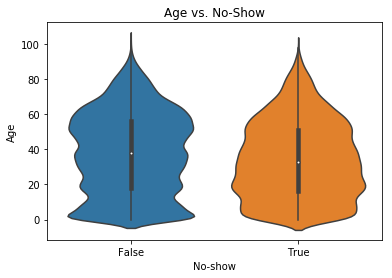

In [5]:
sns.violinplot(x='No-show', y='Age', data=data)
plt.title('Age vs. No-Show');

We can see from the above plot that the distributions of `Age` vary with `No-show`.

#### Neighborhood

In [6]:
print('We have %d neighborhoods in the dataset.' % (len(set(data.Neighbourhood.values))))

We have 81 neighborhoods in the dataset.


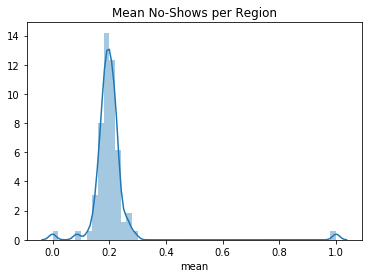

In [7]:
# Plot the raw number of bookings and the probability of no-shows for each neighborhood
neighbourhood_no_shows = data.groupby('Neighbourhood')['No-show'].agg([np.mean, 'count']).reset_index()
sns.distplot(neighbourhood_no_shows['mean'])
plt.title('Mean No-Shows per Region');

We can see from the above that there appears to be a normal distribution around 0.2 for No-Shows for each region, however, there appear to be some regions with 100% or 0% `No-Show`.

**TODO:** Should I remove outliers? Or is this proof that I should not use this as a feature in my models.

In [8]:
display(neighbourhood_no_shows[neighbourhood_no_shows['mean'] == 1])
display(neighbourhood_no_shows[neighbourhood_no_shows['mean'] == 0])

,Neighbourhood,mean,count
34,ILHAS OCEÂNICAS DE TRINDADE,1.0,2


,Neighbourhood,mean,count
51,PARQUE INDUSTRIAL,0.0,1


We can see that this neighborhood has a low number of appointments made, which could account for this outlier mean.

#### Booking Window Days

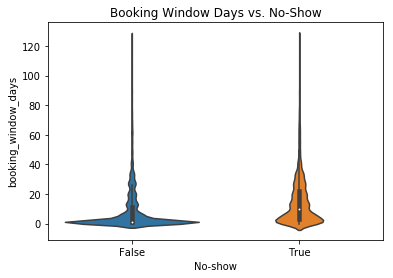

In [9]:
sns.violinplot(x='No-show', y='booking_window_days', data=data)
plt.title('Booking Window Days vs. No-Show');

This is showing us that appointments that are booked for sooner, are more likely to be attended.

#### Gender

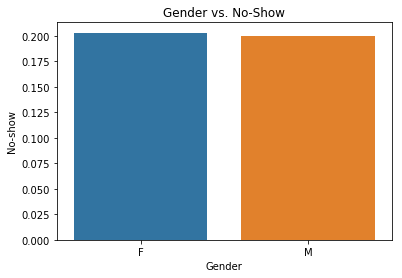

In [10]:
sns.barplot(x='Gender', y='No-show', data=data.groupby('Gender')['No-show'].mean().reset_index())
plt.title('Gender vs. No-Show');

We can see from the above that `Gender` alone is not a significant factor in determining `No-Show`.

#### Hipertension

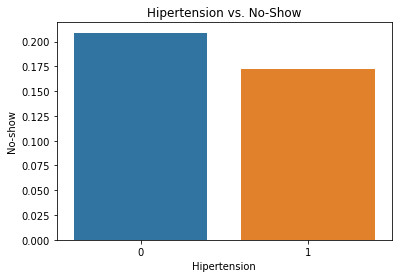

In [11]:
sns.barplot(x='Hipertension', y='No-show', data=data.groupby('Hipertension')['No-show'].mean().reset_index())
plt.title('Hipertension vs. No-Show');

We can see from here that these is a difference between the `Hipertension` values and the uses `No-show` values.

#### Scholarship

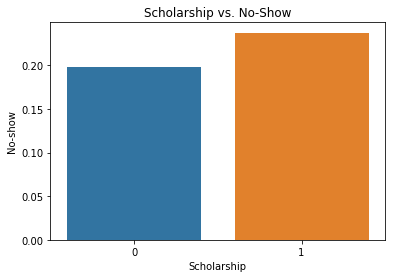

In [12]:
sns.barplot(x='Scholarship', y='No-show', data=data.groupby('Scholarship')['No-show'].mean().reset_index())
plt.title('Scholarship vs. No-Show');

We can see here that there is a difference between the `No-show` values when split over `Scholarship`.

#### Diabetes

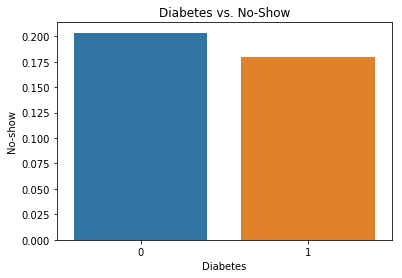

In [13]:
sns.barplot(x='Diabetes', y='No-show', data=data.groupby('Diabetes')['No-show'].mean().reset_index())
plt.title('Diabetes vs. No-Show');

We can see here that there is a difference between the `No-show` values split for `Diabetes`.

#### Alcoholism

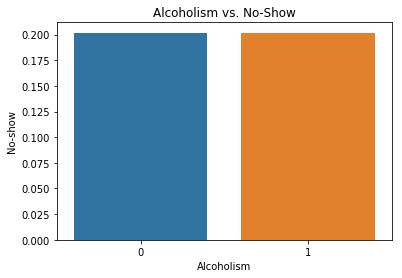

In [14]:
sns.barplot(x='Alcoholism', y='No-show', data=data.groupby('Alcoholism')['No-show'].mean().reset_index())
plt.title('Alcoholism vs. No-Show');

We can see here that there is not a difference between the `No-show` values for `Diabetes`.

#### Handcap

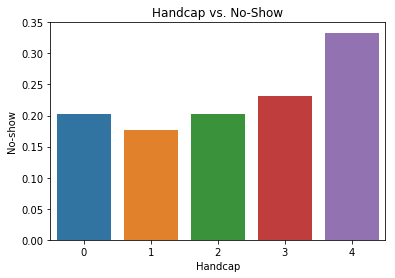

In [15]:
sns.barplot(x='Handcap', y='No-show', data=data.groupby('Handcap')['No-show'].mean().reset_index())
plt.title('Handcap vs. No-Show');

We can see that there are clues in the `Handcap` feature of whether an appointment will be a `No-show`.

#### SMS_Received

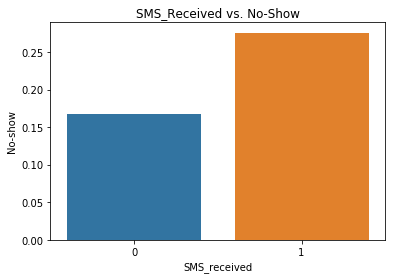

In [16]:
sns.barplot(x='SMS_received', y='No-show', data=data.groupby('SMS_received')['No-show'].mean().reset_index())
plt.title('SMS_Received vs. No-Show');

We can see here that there is a large difference in `No-show` rates depending on whether the patient received an `SMS`.

#### ScheduledHour

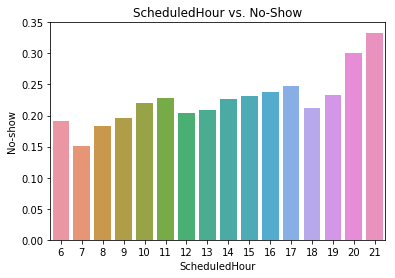

In [17]:
sns.barplot(x='ScheduledHour', y='No-show', data=data.groupby('ScheduledHour')['No-show'].mean().reset_index())
plt.title('ScheduledHour vs. No-Show');

We can see that there is some variation of the percentage of `No-shows` over the `ScheduledHour` values.

#### AppointmentDayOfWeek

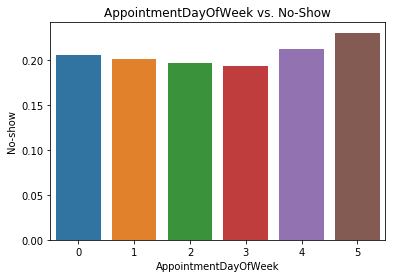

In [18]:
sns.barplot(x='AppointmentDayOfWeek', y='No-show', data=data.groupby('AppointmentDayOfWeek')['No-show'].mean().reset_index())
plt.title('AppointmentDayOfWeek vs. No-Show');


We can see here that there is little variation in the `No-Show` percentage over the `AppointmentDayOfWeek`

#### Patient ID

We have 62242 patients in the dataset.


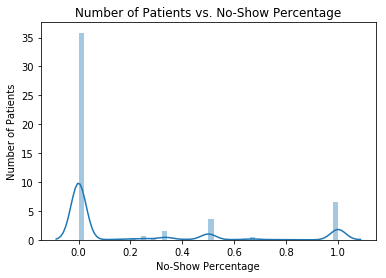

In [19]:
print('We have %d patients in the dataset.' % (len(list(set(data.PatientId.values)))))
sns.distplot(data.groupby('PatientId')['No-show'].agg(['mean', 'count']).reset_index()['mean'])
plt.xlabel('No-Show Percentage')
plt.ylabel('Number of Patients')
plt.title('Number of Patients vs. No-Show Percentage');

We can see that some patients have zero `No-show`, whereas for other patients, it is quite common. 

So we should try to use this as a feature

#### Patient Previous No Shows